### Derived from the tutorial avalible [HERE](https://geographicdata.science/book/data/ghsl/build_ghsl_extract.html)

##GHSL extract

This dataset contains an extract from the [2015 GHSL Pop](https://ghsl.jrc.ec.europa.eu/ghs_pop.php) for the area of Sao Palo (Brazil).

boundry deliniation for the urban aras relies on the [Functional Urban Areas](https://ec.europa.eu/jrc/en/publication/ghsl-oecd-functional-urban-areas) by the GHSL-OECD

In [11]:
import geopandas
import rioxarray
import contextily
import datashader as ds
import matplotlib.pyplot as plt

#### Pull down FUAs

The file with all of the Functional Urban Areas is
avalable at:

In [12]:
url = ("https://jeodpp.jrc.ec.europa.eu/ftp/"\
       "jrc-opendata/GHSL/"\
       "GHS_FUA_UCDB2015_GLOBE_R2019A/V1-0/"\
       "GHS_FUA_UCDB2015_GLOBE_R2019A_54009_1K_V1_0.zip"
      )

From here we can uncompress and read the archive on-the-fly with geopandas:

In [25]:
p = f"zip+{url}!GHS_FUA_UCDB2015_GLOBE_R2019A_54009_1K_V1_0.gpkg"
fuas = geopandas.read_file(p)
sao_paulo = fuas.query("eFUA_name == 'São Paulo'").to_crs("EPSG:4326")
barcelona = fuas.query("eFUA_name == 'Barcelona'").to_crs("EPSG:4326")

In [24]:
fuas.query("Cntry_name == 'Spain'")

,eFUA_ID,UC_num,UC_IDs,eFUA_name,Commuting,Cntry_ISO,Cntry_name,FUA_area,UC_area,FUA_p_2015,UC_p_2015,Com_p_2015,geometry
7808,53.0,1.0,1475,Los Cristianos,1.0,ESP,Spain,174.0,19.0,1.286680e+05,5.300011e+04,75667.868166,"MULTIPOLYGON (((-1553000.000 3430000.000, -155..."
7809,236.0,1.0,1479,Puerto de la Cruz,1.0,ESP,Spain,203.0,29.0,1.477853e+05,9.780836e+04,49976.954062,"MULTIPOLYGON (((-1522000.000 3463000.000, -152..."
7810,395.0,1.0,1488,Santa Cruz de Tenerife,1.0,ESP,Spain,385.0,58.0,4.645791e+05,3.246452e+05,139933.907156,"MULTIPOLYGON (((-1508000.000 3476000.000, -150..."
7811,543.0,1.0,1494,Las Palmas de Gran Canaria,1.0,ESP,Spain,482.0,112.0,6.072365e+05,4.431412e+05,164095.319165,"MULTIPOLYGON (((-1428000.000 3422000.000, -142..."
7812,685.0,1.0,1495,Arinaga,1.0,ESP,Spain,175.0,24.0,1.203757e+05,7.942995e+04,40945.712604,"MULTIPOLYGON (((-1430000.000 3399000.000, -142..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7869,4457.0,1.0,2043,Vilanova i la Geltrú,1.0,ESP,Spain,184.0,26.0,1.678986e+05,6.657109e+04,101327.488383,"MULTIPOLYGON (((144000.000 4938000.000, 145000..."
7870,4490.0,1.0,2048,Manresa,1.0,ESP,Spain,256.0,19.0,1.417670e+05,7.007719e+04,71689.814004,"MULTIPOLYGON (((152000.000 4993000.000, 159000..."
7871,4523.0,2.0,2051;2066,Barcelona,1.0,ESP,Spain,1967.0,611.0,4.609370e+06,3.955431e+06,653939.006718,"MULTIPOLYGON (((187000.000 4990000.000, 188000..."
7872,4589.0,1.0,2076,Palma de Mallorca,1.0,ESP,Spain,793.0,111.0,5.672485e+05,3.880896e+05,179158.945947,"MULTIPOLYGON (((232000.000 4762000.000, 233000..."


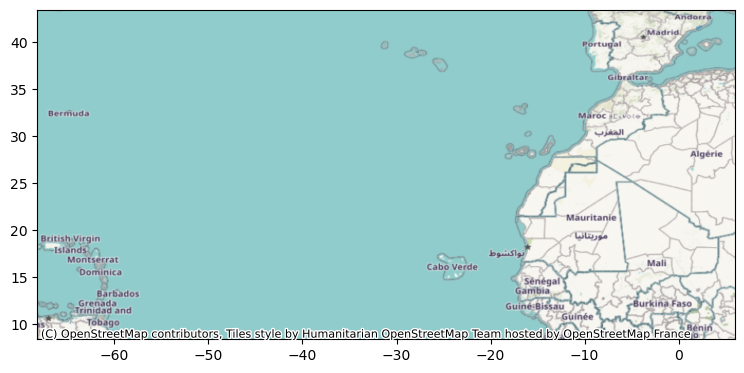

In [26]:
# Sao Paulo
# ax = sao_paulo.plot(alpha=0.5, figsize=(9, 9))
# contextily.add_basemap(ax, crs=sao_paulo.crs);

# Barcelona
ax = barcelona.plot(alpha=0.5, figsize=(9, 9))
contextily.add_basemap(ax, crs=barcelona.crs);

#### Pull down population data

In [27]:
# Sao_Paulo
# url=("https://jeodpp.jrc.ec.europa.eu/ftp/"\
#      "jrc-opendata/GHSL/GHS_POP_GLOBE_R2023A/"\
#      "GHS_POP_E2020_GLOBE_R2023A_54009_100/V1-0"\
#      "/tiles/"\
#      "GHS_POP_E2020_GLOBE_R2023A_54009_100_V1_0_R12_C14.zip"    
#     )


# Barcelona
url=("https://jeodpp.jrc.ec.europa.eu/ftp/"\
     "jrc-opendata/GHSL/GHS_POP_GLOBE_R2023A/"\
     "GHS_POP_E2020_GLOBE_R2023A_54009_100/V1-0"\
     "/tiles/"\
     "GHS_POP_E2020_GLOBE_R2023A_54009_100_V1_0_R5_C19.zip" 
    )

url

'https://jeodpp.jrc.ec.europa.eu/ftp/jrc-opendata/GHSL/GHS_POP_GLOBE_R2023A/GHS_POP_E2020_GLOBE_R2023A_54009_100/V1-0/tiles/GHS_POP_E2020_GLOBE_R2023A_54009_100_V1_0_R5_C19.zip'

From here we ca uncompress and read the data with xarray:

In [28]:
%%time
# Sao_Paulo
#p = f"zip+{url}!GHS_POP_E2020_GLOBE_R2023A_54009_100_V1_0_R12_C14.tif" 

# Barcelona
p = f"zip+{url}!GHS_POP_E2020_GLOBE_R2023A_54009_100_V1_0_R5_C19.tif"

ghsl = rioxarray.open_rasterio(p)
ghsl


CPU times: user 14.4 ms, sys: 171 µs, total: 14.6 ms
Wall time: 12.8 ms


<xarray.DataArray (band: 1, y: 10000, x: 10000)> Size: 800MB
[100000000 values with dtype=float64]
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 80kB -4.095e+04 -4.085e+04 ... 9.588e+05 9.59e+05
  * y            (y) float64 80kB 5e+06 5e+06 5e+06 5e+06 ... 4e+06 4e+06 4e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -200.0
    scale_factor:   1.0
    add_offset:     0.0

In [29]:
cvs = ds.Canvas(plot_width=600, plot_height=600)
agg = cvs.raster(ghsl.where(ghsl>0).sel(band=1))

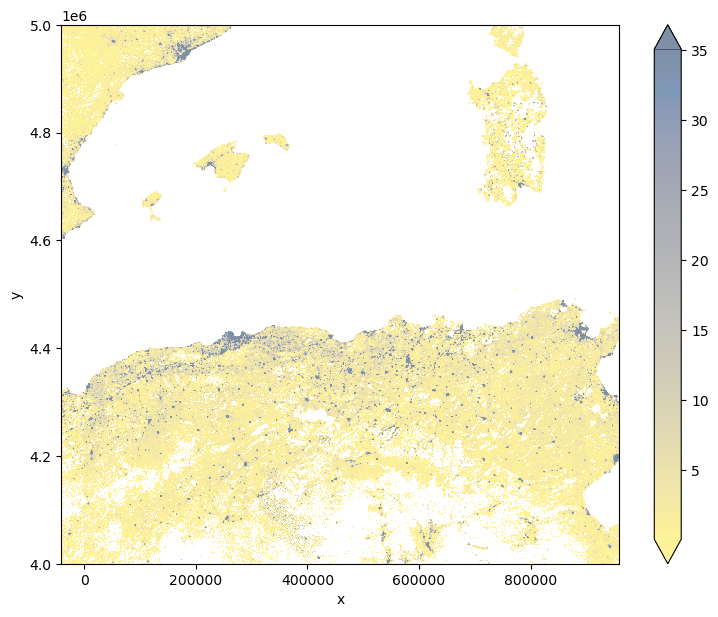

In [30]:
fig, ax = plt.subplots(1, figsize=(9,7))
agg.plot.imshow(ax=ax, alpha=0.5, cmap="cividis_r", robust=True)


#### Extraction

To clip what we need from gshl based on the FUA we selected:

In [31]:
# # --- Sao Paulo
# # Ensure you have the correct geometry
# geometry = sao_paulo.to_crs(ghsl.rio.crs).geometry.iloc[0]

# # If geometry is not already a list, wrap it in a list
# if not isinstance(geometry, (list, tuple)):
#     geometry = [geometry]

# # Now use the geometry in the clip method
# ghsl_sp = ghsl.rio.clip(geometry)
# ghsl_sp


# --- Barcelona 
# Ensure you have the correct geometry
geometry = barcelona.to_crs(ghsl.rio.crs).geometry.iloc[0]

# If geometry is not already a list, wrap it in a list
if not isinstance(geometry, (list, tuple)):
    geometry = [geometry]

# Now use the geometry in the clip method
ghsl_ba = ghsl.rio.clip(geometry)
ghsl_ba


<xarray.DataArray (band: 1, y: 640, x: 690)> Size: 4MB
array([[[-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        ...,
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.],
        [-200., -200., -200., ..., -200., -200., -200.]]])
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 6kB 1.49e+05 1.492e+05 ... 2.178e+05 2.18e+05
  * y            (y) float64 5kB 4.991e+06 4.991e+06 ... 4.927e+06 4.927e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0
    _FillValue:     -200.0

Finally we can write to a GeoTiff File: 

In [36]:
#out_p = "./data/ghsl_sao_paulo.tif"# Sao Paulo
out_p = "./data/ghsl_barcelona.tif"# S
! rm $out_p
ghsl_ba.rio.to_raster(out_p)

In [37]:
! rio cogeo validate ghsl_sao_paulo.tif


Usage: rio [OPTIONS] COMMAND [ARGS]...
Try 'rio --help' for help.

Error: No such command 'cogeo'.
